In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats
import numpy as np

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

In [4]:
ds_xl = xr.open_dataset('files/mean_xl_ts.nc')
ds_l = xr.open_dataset('files/mean_l_ts.nc')
ds_m = xr.open_dataset('files/mean_m_ts.nc')
ds_s = xr.open_dataset('files/mean_s_ts.nc')
ds_xs = xr.open_dataset('files/mean_xs_ts.nc')
ds_2c = xr.open_dataset('files/mean_2c_ts.nc')

$r=-0.89, p=0.000$
$r=-0.88, p=0.000$
$r=-0.86, p=0.000$
$r=-0.87, p=0.000$
$r=-0.90, p=0.000$
$r=-0.92, p=0.000$


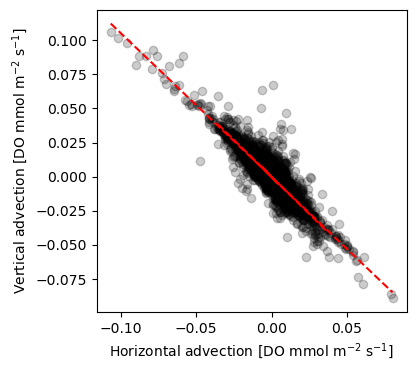

In [5]:
fig, ax = plt.subplots(figsize=(4,4), dpi=100)

for ds in [ds_xl, ds_l, ds_m, ds_s, ds_xs, ds_2c]:
    slope, intercept, r_value, p_value, stderr = stats.linregress(ds.hadv, ds.vadv)
    xlr = np.linspace(ds.hadv.min(), ds.hadv.max(), 100)
    ax.scatter(ds.hadv, ds.vadv, c='k', alpha=.2) 
    ax.plot(xlr, slope*xlr+intercept, 'r--')
    # ax.text(.4, .85, r'$r=%.2f, p=%.3f$' % (r_value, p_value), 
    #         transform=ax.transAxes)

    print('$r=%.2f, p=%.3f$' % (r_value, p_value))
    ax.set_xlabel(r'Horizontal advection [DO mmol m$^{-2}$ s$^{-1}$]')
    ax.set_ylabel(r'Vertical advection [DO mmol m$^{-2}$ s$^{-1}$]')
# ax.set_xlim(xlr[0], xlr[-1])


In [6]:
import seaborn as sns; sns.set()

In [7]:
fmt = mdates.DateFormatter('%m/%d')
def plot_flux(ax, ds):
        ax.axhline(c='k', ls=':')
        sns.lineplot(ds.ocean_time, ds['rate'], label='rate')
        sns.lineplot(ds.ocean_time, ds['hadv'], label='hadv',)
        sns.lineplot(ds.ocean_time, ds['vadv'], label='vadv',)
        sns.lineplot(ds.ocean_time, ds['vdiff'], label='vdif')
        sns.lineplot(ds.ocean_time, ds['SOD'], label='sod',)
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
        ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
        ax.xaxis.set_major_formatter(fmt)
        ax.set_xlim(ds.ocean_time[0].data,ds.ocean_time[-1].data)

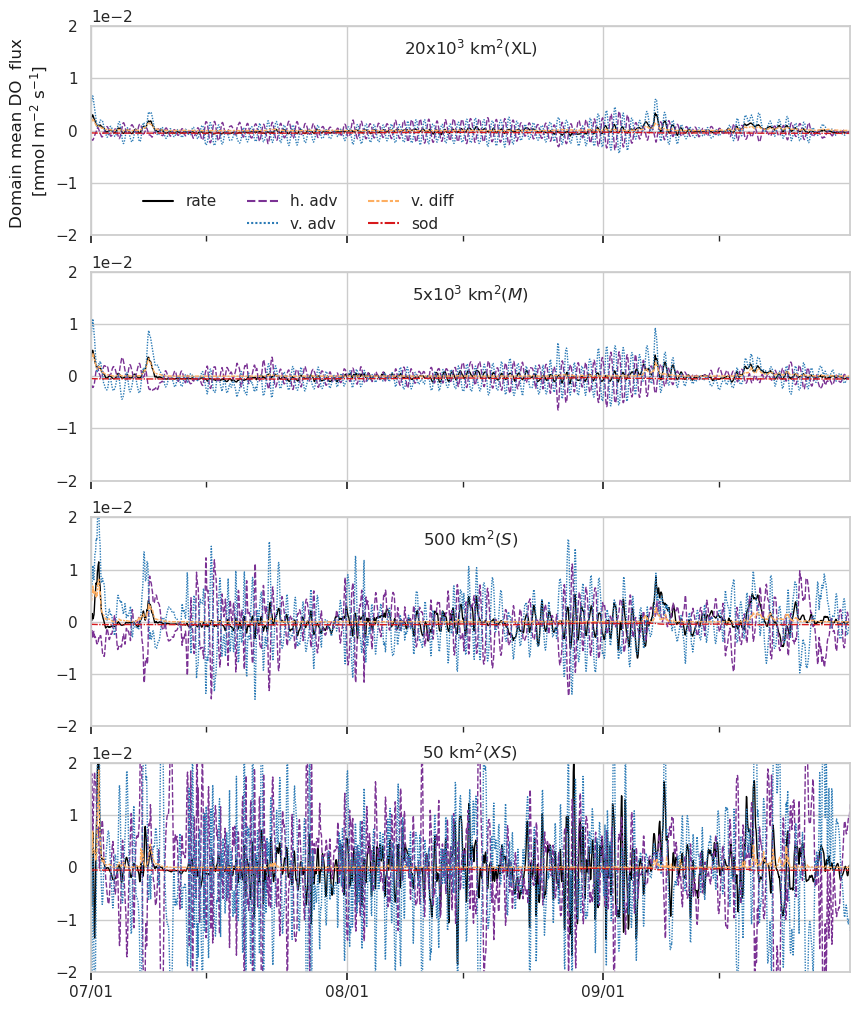

In [10]:
# sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})
sns.set_style('whitegrid', rc={"xtick.bottom" : True,})


colors = ["black", "ocean blue", "coral", "amber", "crimson"]
colors = ['#000000','#7b3294','#2c7bb6', '#fdae61','#d7191c',]
# sns.set_palette(sns.xkcd_palette(colors))
sns.set_palette(sns.color_palette(colors))
datasets = [ds_xl, ds_m, ds_s, ds_xs]
scales = [r'20x10$^{3}$ km$^{2}$(XL)', r'5x10$^{3}$ km$^{2}(M)$',  
          r'500 km$^{2}(S)$', r'50 km$^{2}(XS)$', ]

llabels = ['rate',
           'h. adv', 'v. adv',
           'v. diff', 'sod',]

fig, axes = plt.subplots(nrows=4, ncols=1, sharey=True, sharex=True, figsize=(8.5,10), dpi=100)

legend='brief'
for ax, ds, s in zip(axes.flatten(), datasets, scales):
    for coord in ds.coords:
        if coord!='ocean_time':
            ds=ds.drop(coord)
    df = ds.to_dataframe()
#     df.columns=[r'$\frac{\partial Ox}{\partial t}$', 
#           r'$\vec{v}_h\cdot Ox$',
#           r'$w \, Ox$',
#           r'$Ak_T \, \frac{\partial{Ox}}{\partial{z}}$', 
#           'SOD']
    df.columns = llabels
    if s!=scales[0]:
        legend=False
    sns.lineplot(data=df, lw=1, ax=ax, legend=legend)
#     ax.tick_params(labelbottom=False, labelleft=False)
    ax.set_ylim(-2e-2,2e-2)
    ax.set_title(s, pad=-20)

h, l = axes[0].get_legend_handles_labels()
h.insert(1, axes[0].plot(np.NaN, np.NaN, c='w')[0])
l.insert(1,'')
axes[0].get_legend().remove()
axes[0].legend(h,l, ncol=3, frameon=False, loc='lower left', bbox_to_anchor=(0.05, -.05))

axes[0].tick_params(labelleft=True)
axes[0].set_ylabel('Domain mean DO  flux \n' r'[mmol m$^{-2}$ s$^{-1}$]', size=12, color='k')
axes[-1].tick_params(labelbottom=True)
axes[-1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
axes[-1].xaxis.set_minor_locator(mdates.DayLocator(bymonthday=15))

axes[-1].set_xlabel('')
# axes[1,1].set_xlabel('')
axes[-1].xaxis.set_major_formatter(fmt)
axes[-1].set_xlim(ds.ocean_time[0].data,ds.ocean_time[-1].data)

axes[0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
fig.tight_layout(pad=.3)
fig.savefig('figures/mean_multi.png')

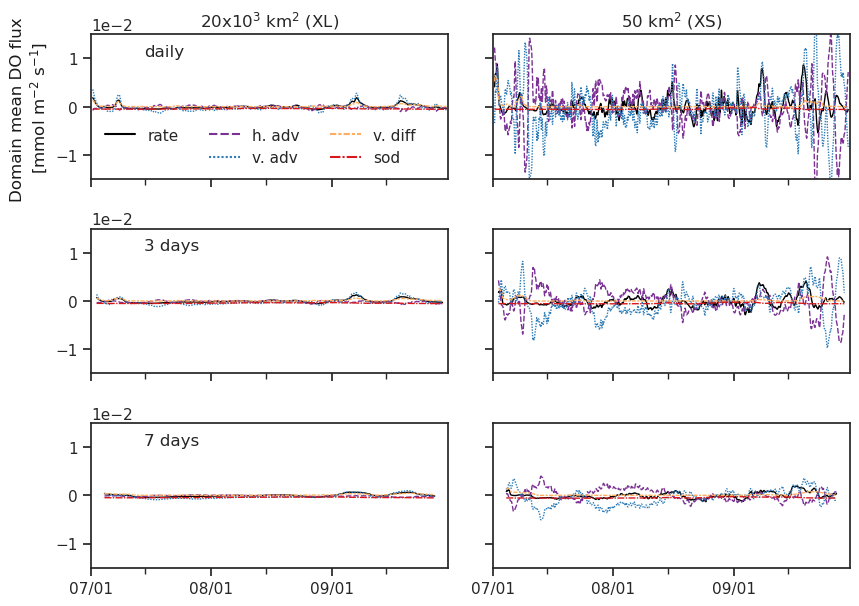

In [12]:
sns.set_style('ticks')
datasets = [ds_xl, ds_xs,]
scales = [r'20x10$^{3}$ km$^{2}$ (XL)', r'50 km$^{2}$ (XS)', ]
filters = [24, 3*24, 7*24]
# labels = ['rate', 'hadv', 'vadv', 'vdiff', 'SOD',]
fig, axes = plt.subplots(nrows=3, ncols=2, sharey=True, sharex=True, figsize=(8.5,6), dpi=100)

legend='brief'
for c, ds in enumerate(datasets):
    for coord in ds.coords:
        if coord!='ocean_time':
            ds=ds.drop(coord)
    df = ds.to_dataframe()
    df.columns=[r'$\frac{\partial Ox}{\partial t}$', 
      r'$\vec{v}_h\cdot Ox$',
      r'$w \, Ox$',
      r'$Ak_T \, \frac{\partial{Ox}}{\partial{z}}$', 
      'SOD']
    df.columns = llabels
    for r, f in enumerate(filters):
        if r+c!=0:
            legend=False
        sns.lineplot(data=df.rolling(f, center=True).mean(), lw=1, ax=axes[r,c], legend=legend)        
#             plot_flux(axes[r,c], ds.rolling(ocean_time=f, center=True).mean())
#             axes[r,c].tick_params(labelbottom=False, labelleft=False)
        axes[r,c].set_ylim(-1.5e-2,1.5e-2)
        if r ==0:
            axes[r,c].set_title(scales[c])
axes[0,0].text(.15, .85,'daily', transform=axes[0,0].transAxes)
axes[1,0].text(.15, .85,'3 days', transform=axes[1,0].transAxes)
axes[2,0].text(.15, .85,'7 days', transform=axes[2,0].transAxes)

axes[0,0].tick_params(labelleft=True)
axes[0,0].set_ylabel('Domain mean DO flux \n' r'[mmol m$^{-2}$ s$^{-1}$]', size=12, color='k')
axes[0,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axes[2,0].tick_params(labelbottom=True)
axes[2,0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
axes[2,0].xaxis.set_minor_locator(mdates.DayLocator(bymonthday=15))
axes[2,0].xaxis.set_major_formatter(fmt)
axes[2,0].set_xlim(ds.ocean_time[0].data,ds.ocean_time[-1].data)

axes[-1,0].set_xlabel('')
axes[-1,1].set_xlabel('')
h, l = axes[0,0].get_legend_handles_labels()
h.insert(1, axes[0,0].plot(np.NaN, np.NaN, c='w')[0])
l.insert(1,'')
axes[0,0].get_legend().remove()
axes[0,0].legend(h,l, ncol=3, frameon=False, loc='lower left')
fig.tight_layout(pad=.3)
# fig.savefig('filters.png')


fig.savefig('figures/filters.png')